## Tweet Sentiment Analysis

source: https://www.youtube.com/watch?v=ujId4ipkBio


In [1]:
# Import stuff
import os
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'tweepy'

In [2]:
# Set the Twitter API

api_key = os.getenv('API_KEY') 
api_secret = os.getenv('API_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_secret = os.getenv('ACCESS_SECRET')

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [3]:
# Get the Tweets!
tweets = api.user_timeline(screen_name='billgates', count=100, lang='en', tweet_mode='extended')

for tweet in tweets[0:5]:
    print(tweet.full_text)

Unexpected parameter: lang


@mansukhmandviya It was great to meet Dr @mansukhmandviya and exchange perspectives on global health. India's success with the vaccination drive and the use of technology to drive health outcomes at scale offers many lessons for the world.
Happy to meet Prime Minister @sanchezcastejon and members of his government today in Madrid. Great to see his leadership and commitment to addressing some of the most pressing global challenges, particularly more equity in global health, climate change and food security. https://t.co/gCUdvKr4jj
The school shooting in Texas is heartbreaking. No parent should worry that their child isn’t safe at school. We must come together and act now so this never happens again.
Not long ago, the world increased aid for global health during a time of crisis. We must do so again. https://t.co/zAOZ1tbKcw
.@PardisSabeti is working to detect pathogens earlier and stop pandemics in the their tracks. https://t.co/g9ejMe3O2B


In [4]:
# Put everuything inside pandas
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
df.head()

,Tweets
0,@mansukhmandviya It was great to meet Dr @mans...
1,Happy to meet Prime Minister @sanchezcastejon ...
2,The school shooting in Texas is heartbreaking....
3,"Not long ago, the world increased aid for glob..."
4,.@PardisSabeti is working to detect pathogens ...


In [5]:
def clean(text):
    # remove mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # remove hashtag symbol
    text = re.sub(r'#', '', text)
    # remove retweets
    text = re.sub(r'RT[\s]+', '', text)
    # remove URLs
    text = re.sub(r'https?:\/\/\S+', '', text)

    return text


In [6]:
df['Tweets'] = df['Tweets'].apply(clean)
df

,Tweets
0,It was great to meet Dr and exchange perspec...
1,Happy to meet Prime Minister and members of h...
2,The school shooting in Texas is heartbreaking....
3,"Not long ago, the world increased aid for glob..."
4,. is working to detect pathogens earlier and s...
...,...
95,"What a devastating loss. Paul is a hero, and I..."
96,It has been over a year since wild polio paral...
97,Thank you for the productive discussions on t...
98,I’m hopeful that the world can come together t...


In [7]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Subjectivity,Polarity
0,It was great to meet Dr and exchange perspec...,0.250000,0.340000
1,Happy to meet Prime Minister and members of h...,0.458333,0.433333
2,The school shooting in Texas is heartbreaking....,0.500000,0.500000
3,"Not long ago, the world increased aid for glob...",0.200000,0.012500
4,. is working to detect pathogens earlier and s...,0.500000,0.000000
...,...,...,...
95,"What a devastating loss. Paul is a hero, and I...",0.721429,-0.073377
96,It has been over a year since wild polio paral...,0.633333,0.566667
97,Thank you for the productive discussions on t...,0.000000,0.000000
98,I’m hopeful that the world can come together t...,0.316667,0.333333


(-0.5, 499.5, 299.5, -0.5)

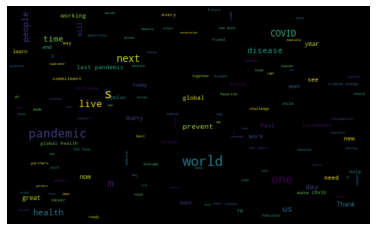

In [8]:
all_words = ' '.join( twt for twt in df['Tweets'])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=19).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [9]:
# function to compute if the negative, neutral and positive stuff
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(get_analysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,It was great to meet Dr and exchange perspec...,0.250000,0.340000,Positive
1,Happy to meet Prime Minister and members of h...,0.458333,0.433333,Positive
2,The school shooting in Texas is heartbreaking....,0.500000,0.500000,Positive
3,"Not long ago, the world increased aid for glob...",0.200000,0.012500,Positive
4,. is working to detect pathogens earlier and s...,0.500000,0.000000,Neutral
...,...,...,...,...
95,"What a devastating loss. Paul is a hero, and I...",0.721429,-0.073377,Negative
96,It has been over a year since wild polio paral...,0.633333,0.566667,Positive
97,Thank you for the productive discussions on t...,0.000000,0.000000,Neutral
98,I’m hopeful that the world can come together t...,0.316667,0.333333,Positive


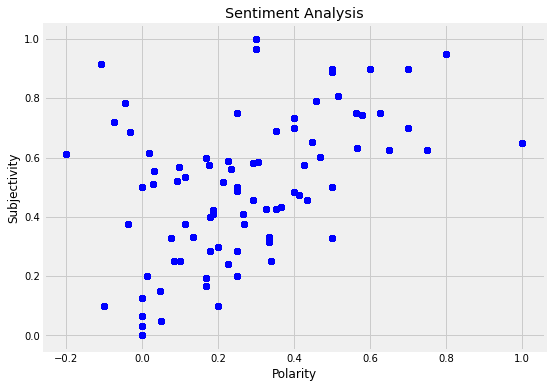

In [10]:
plt.figure(figsize=(8,6))

for i in range(df.shape[0]):
    plt.scatter(df['Polarity'], df['Subjectivity'], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()